# Homework 5 

In [30]:
#imports
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import itertools as it

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [31]:
seed = 42

### Gradient descent and backpropagationg in a simple neural network

did most on paper, but didnt bother writing it into latex

In [32]:
def func(w):
    # task 1 and 2
    # also did it by hand, but had to check
    x = [
        [2,1],
        [-3,2]
    ]
    y = [1.3, 1.9]
    print(w)
    def relu(x):
        return max(0, x)

    def layer1(x, w):
        return relu(x[0] * w[0] + x[1] * w[1] + w[2])

    def output(z, w):
        return z * w[3] + w[4]

    sum = 0
    for xs, ys in zip(x, y):
        z = layer1(xs, w)
        print(f"z:{z}")
        o = output(z, w)
        sum = sum + (o - ys) ** 2
        print(f"guessed value: {o}, actual value: {ys}")

    print(f"mean of mse:{sum/len(y)}")


print("first pass")
w = [1,1,0,1,0]
func(w)

print("\nsecond pass")
# my hand calculated gradient
# may be wrong iunno
w2 = [3.4, 1.7, 1.7, 5.1, -0.2]
w = np.array(w) - 0.01 * np.array(w2)
func(w)

first pass
[1, 1, 0, 1, 0]
z:3
guessed value: 3, actual value: 1.3
z:0
guessed value: 0, actual value: 1.9
mean of mse:3.25

second pass
[ 0.966  0.983 -0.017  0.949  0.002]
z:2.898
guessed value: 2.7522019999999996, actual value: 1.3
z:0
guessed value: 0.002, actual value: 1.9
mean of mse:2.855647324401999


### Neural networks for regression task using scikit-learn

In [33]:
features = np.load("features.npy", allow_pickle=True)
targets = np.load("targets.npy")
print(features.shape, targets.shape)

(4177, 7) (4177, 1)


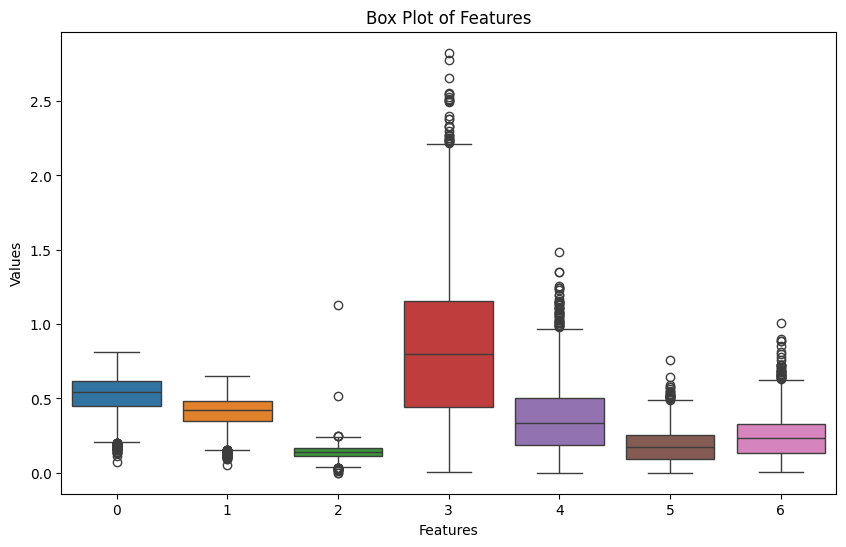

In [34]:
# Distribution plot Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

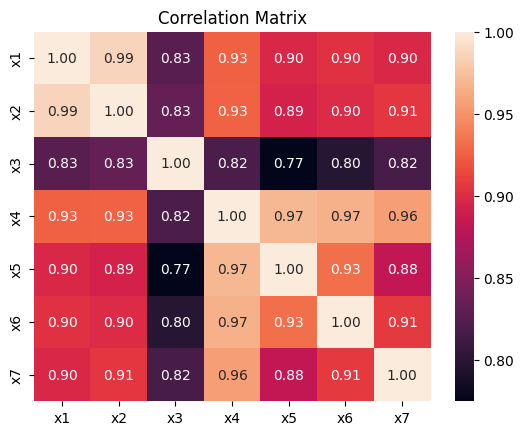

In [35]:
# correlation matrix
R1 = np.corrcoef(features, rowvar=False, dtype=np.float64)
labels = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"]
plt.title("Correlation Matrix")
sns.heatmap(R1, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.show()

In [36]:
X_train, X_val_test, y_train, y_val_test = train_test_split(
    features, targets[:,0], test_size=0.2, random_state=seed)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=seed)

In [37]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [38]:
mlp = MLPRegressor(random_state=seed, verbose=False)
param_grid = {
    'hidden_layer_sizes': [(20, 3), (37, 3), (50, 3), (100,), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'], # i just tried all of them
    'solver': ['sgd', 'adam', 'lbfgs'], # same with here
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'alpha': [0.0001, 0.01, 0.1],
    'max_iter': [1000],
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True],
    'momentum' : [0.9, 0.95, 0.99],
}

grid_search = RandomizedSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.0001, 0.01, 0.1],
                                        'early_stopping': [True],
                                        'hidden_layer_sizes': [(20, 3), (37, 3),
                                                               (50, 3), (100,),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01],
                                        'max_iter': [1000],
                                        'momentum': [0.9, 0.95, 0.99],
                                        'solver': ['sgd', 'adam', 'lbfgs']},
                   scoring='neg_mean_squared_error')

In [39]:
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"mse: {mse}")

Best parameters: {'solver': 'sgd', 'momentum': 0.99, 'max_iter': 1000, 'learning_rate_init': 0.0001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'early_stopping': True, 'alpha': 0.0001, 'activation': 'relu'}
Best MSE: 4.655334934364648
mse: 4.985541860414457


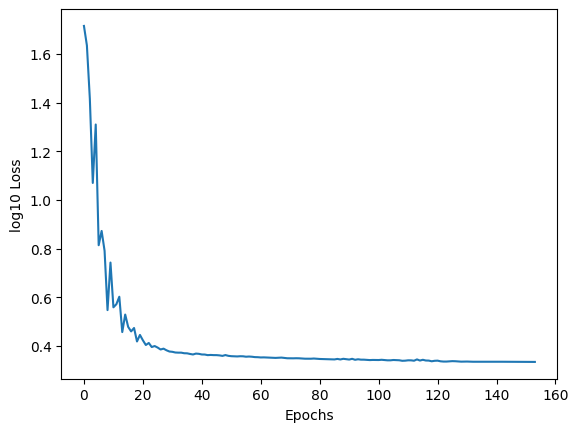

In [40]:
# loss over epochs
log_loss = np.log10(grid_search.best_estimator_.loss_curve_)

plt.plot(log_loss)

plt.xlabel('Epochs')
plt.ylabel('log10 Loss')
plt.show()

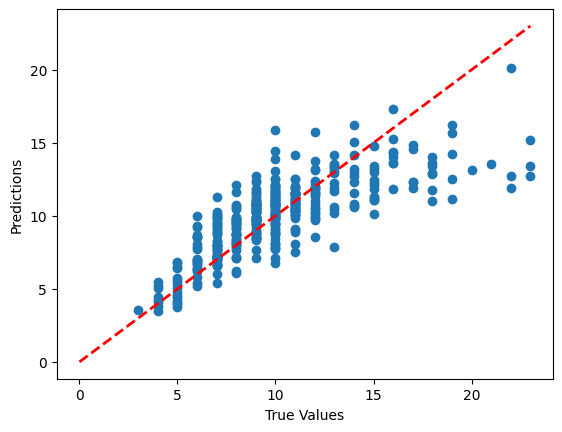

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', lw=2, linestyle='--')
plt.show()

It seemed to have a really hard time guessing the larger true values for some reason